# Clustering

## Read data from ‘Personal cost medical.csv’

In [9]:
#import library that need to use 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('insurance.csv')

### Basic Exploration & Data Cleaning & Feature Engineering

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
#use for identification data type
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [13]:
#Finding missing values for each feature
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [14]:
#get numeric data
num_data = df.select_dtypes(include='number')
num_data.head()

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520


In [15]:
#get categorical data
cat_data = df.select_dtypes(include='object')
cat_data.head()

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest


#### Exploratory Data Analysis

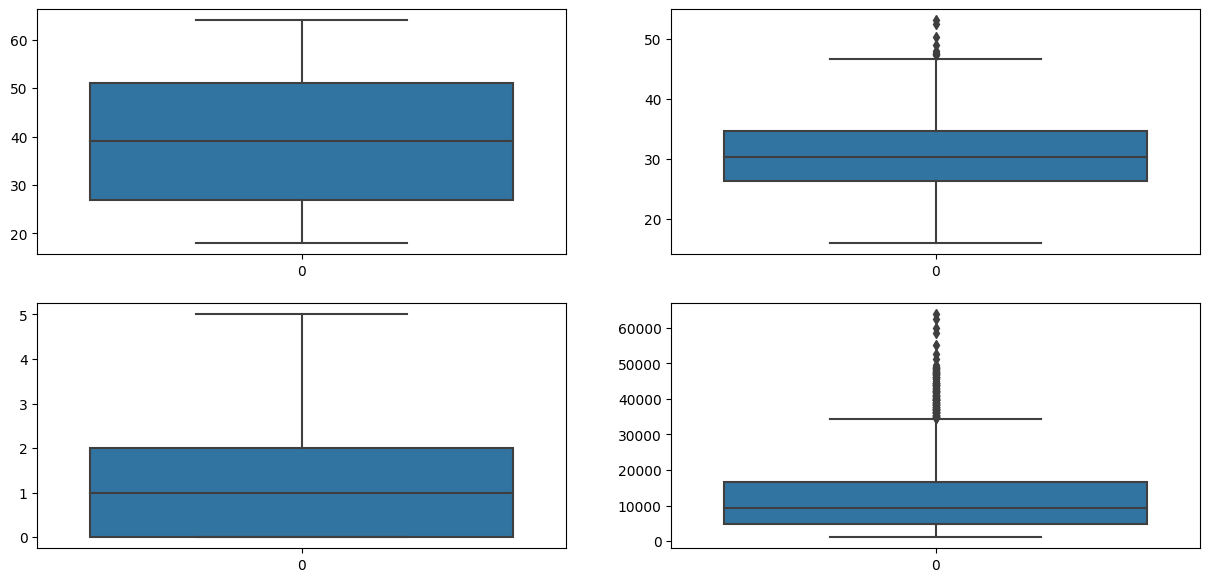

In [16]:
# Create count plots for all nominal features
fig, ax = plt.subplots(2, 2, figsize=(15, 7))
for i, subplot in zip(num_data.columns, ax.flatten()):
    sns.boxplot(num_data[i], ax=subplot)

Text(0.5, 1.0, 'Distribution of charges by age and smoker')

<Figure size 1200x1000 with 0 Axes>

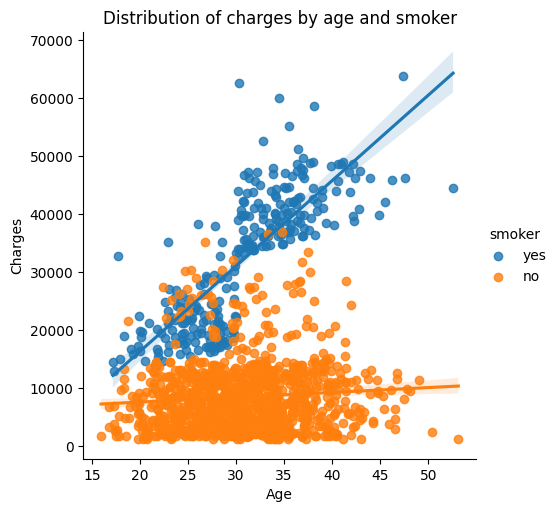

In [17]:
#The relationship between insurance claim amounts and age.
plt.figure(figsize = (12, 10))
sns.lmplot(x="bmi", y="charges", hue='smoker', data=df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of charges by age and smoker")

Text(0.5, 1.0, 'Distribution of charges by bmi and sex')

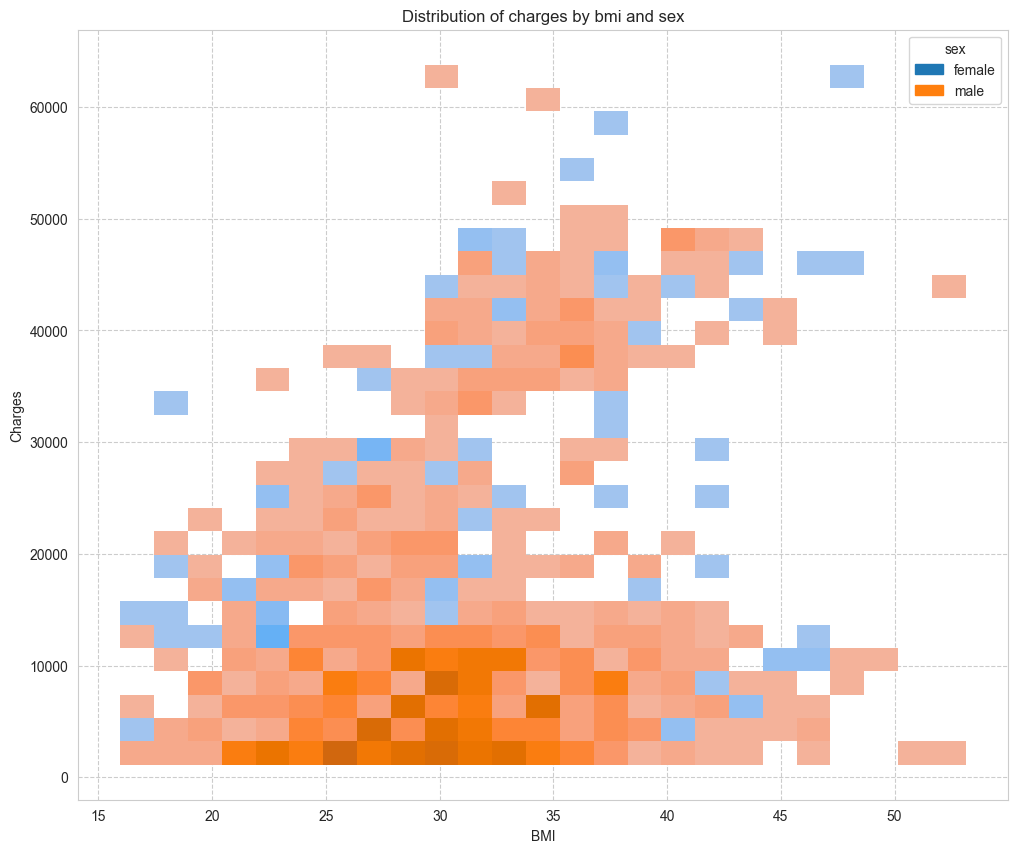

In [18]:
#The relationship between BMI and insurance claims.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.histplot(x = "bmi", y = "charges", hue="sex", data = df)
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.title("Distribution of charges by bmi and sex")

Text(0.5, 1.0, 'Distribution of Charges by Age and Region')

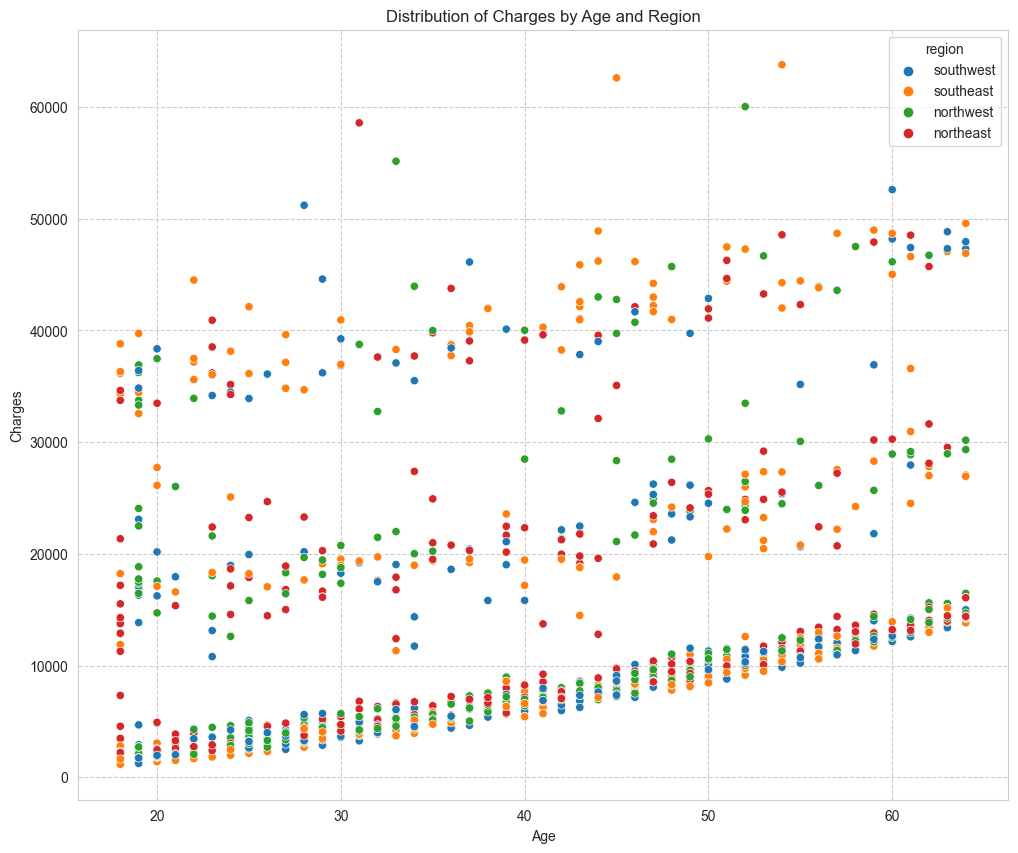

In [19]:
#The relationship between insurance claim amounts and age.
sns.set_style("whitegrid", {'grid.linestyle': '--'})
plt.figure(figsize = (12, 10))
sns.scatterplot(x = "age", y = "charges", hue="region",data = df)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Distribution of Charges by Age and Region")

<AxesSubplot:>

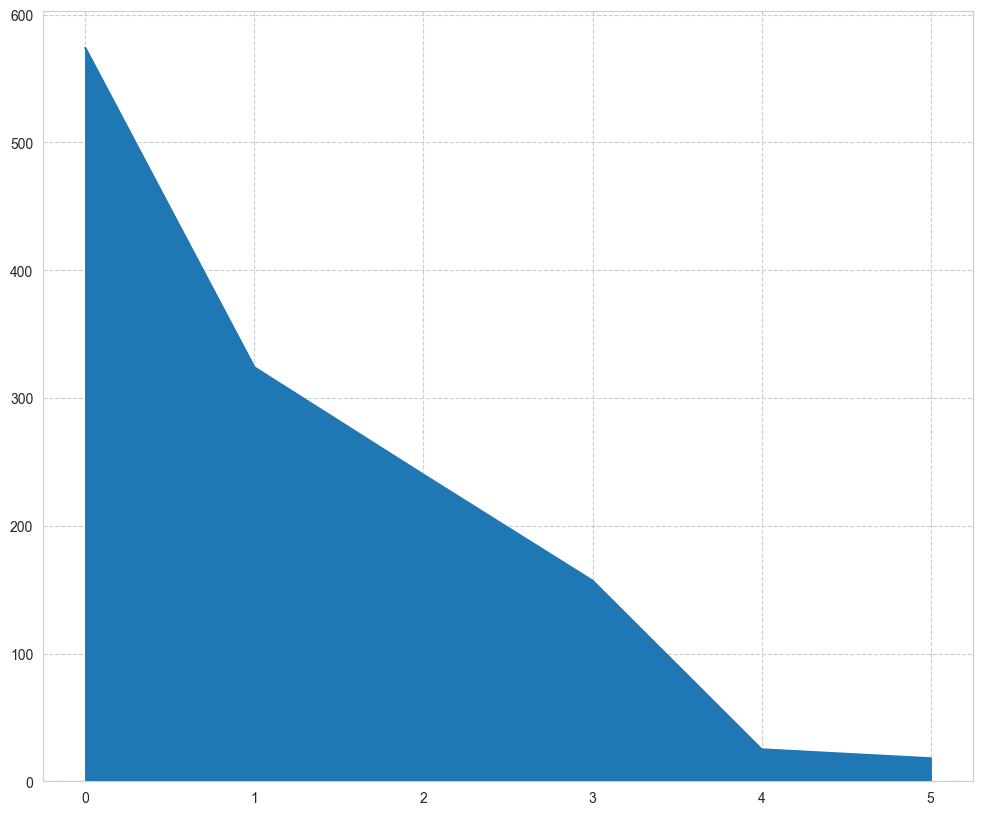

In [20]:
plt.figure(figsize=(12,10))
df['children'].value_counts().plot.area()

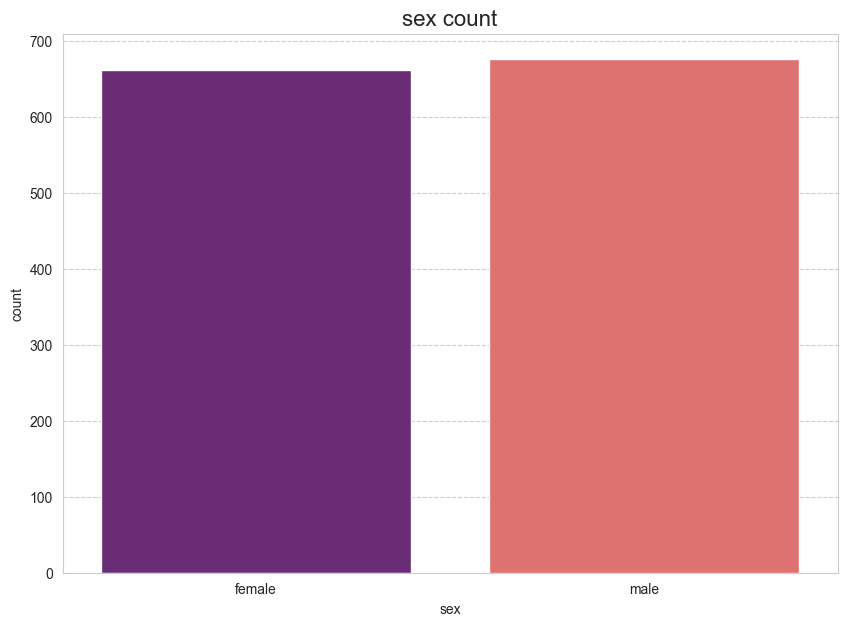

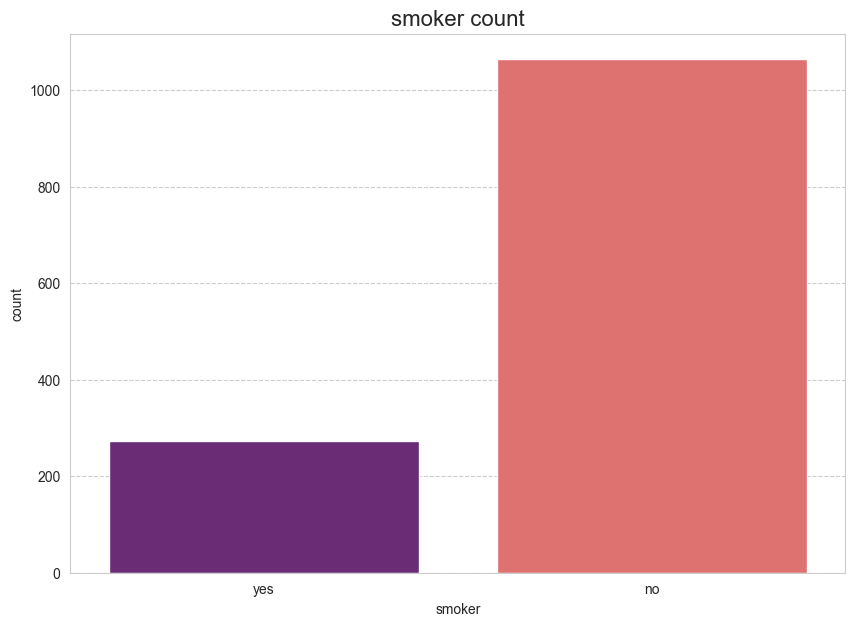

In [21]:
#boxplot for each feature
def boxplot(col_name):
    axes = plt.subplots(nrows=1, ncols=1, figsize = (10, 7))
    sns.countplot(ax = axes[1], x = col_name , data = df, palette = 'magma')
    axes[1].set_title((col_name + ' count'), fontsize = 16)
    plt.subplots_adjust(hspace = 0.5)

boxplot('sex')
boxplot('smoker')

<AxesSubplot:ylabel='region'>

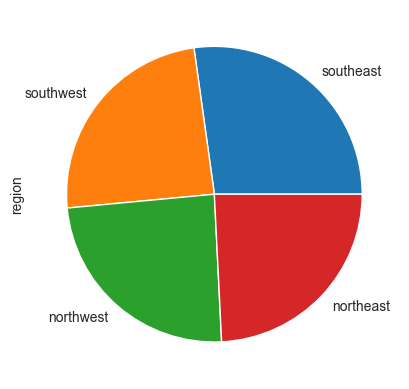

In [22]:
df['region'].value_counts().plot.pie()

In [23]:
# One-hot encoding for nominal features
cat_data = pd.get_dummies(cat_data)
cat_data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [24]:
# Combine nominal and numeric features
df = pd.concat([num_data, cat_data], axis=1, sort=False)
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


#### Normalization

In [25]:
# Rescaling features into a range of [0,1]
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X = mms.fit_transform(df)
X = pd.DataFrame(X, columns=df.columns)
X.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0.021739,0.321227,0.0,0.251611,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.000000,0.479150,0.2,0.009636,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.217391,0.458434,0.6,0.053115,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.326087,0.181464,0.0,0.333010,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.304348,0.347592,0.0,0.043816,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
